# TV Shows by Mood

**Note:** some of the code uses df_ten instead of df bc runtime is so long for df, so make sure to change it later (also, change df_new to use df, not df_ten) and range when finding the best k value for knn

In [14]:
%matplotlib inline

In [1]:
import pandas as pd

url = "/Users/ayushi/Downloads/title.basics.tsv"
df = pd.read_csv(url, sep='\t', dtype='unicode')
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short


In [2]:
print(df.head(5).to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>tconst</th>
      <th>titleType</th>
      <th>primaryTitle</th>
      <th>originalTitle</th>
      <th>isAdult</th>
      <th>startYear</th>
      <th>endYear</th>
      <th>runtimeMinutes</th>
      <th>genres</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>tt0000001</td>
      <td>short</td>
      <td>Carmencita</td>
      <td>Carmencita</td>
      <td>0</td>
      <td>1894</td>
      <td>\N</td>
      <td>1</td>
      <td>Documentary,Short</td>
    </tr>
    <tr>
      <th>1</th>
      <td>tt0000002</td>
      <td>short</td>
      <td>Le clown et ses chiens</td>
      <td>Le clown et ses chiens</td>
      <td>0</td>
      <td>1892</td>
      <td>\N</td>
      <td>5</td>
      <td>Animation,Short</td>
    </tr>
    <tr>
      <th>2</th>
      <td>tt0000003</td>
      <td>short</td>
      <td>Pauvre Pierrot</td>
      <td>Pauvre Pierrot</td>
      <td>0

## Preprocessing 

In [ ]:
columns = ['Animation', 'Comedy', 'Documentary', 'Romance', 'Short', 'Sport']
features = df_new.loc[:, columns].values 
labels = df_new.loc[:, ['mood']].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer

scalers = {}

# assumes data is normally distributed and will scale them such that the distribution now has mean 0 with a 
# standard deviation of 1
standard = StandardScaler().fit_transform(features)
scalers['standard'] = standard

# data is scaled to a fixed range - usually 0 to 1 (or -1 to 1 if there are negative values), sensitive to outliers
minmax = MinMaxScaler().fit_transform(features)
scalers['minmax'] = minmax

maxabs = MaxAbsScaler().fit_transform(features)
scalers['maxabs'] = maxabs

# works well with outliers (uses IQR)
robust = RobustScaler().fit_transform(features)
scalers['robust'] = robust

quantile = QuantileTransformer().fit_transform(features)
scalers['quantile'] = quantile

normalizer = Normalizer().fit_transform(features)
scalers['normalizer'] = normalizer

**Mood Types**

"I'm in the mood to be..."
* Excited = action / adventure / thriller / mystery / sport
* Scared = anything with horror
* Humored = anything with comedy
* Educated = documentary / biography / history
* Romanced = anything with romance
* Young = must be NOT adult + animation / short / comedy 
* Explorative = fantasy / sci-fi / war

In [3]:
df_ten = df.head(10)

In [4]:
is_excited = lambda genres: 'Action' in genres or 'Adventure' in genres or 'Thriller' in genres or 'Mystery' in genres or 'Sport' in genres 
is_scared = lambda genres: 'Horror' in genres
is_humored = lambda genres: 'Comedy' in genres
is_educated = lambda genres: 'Documentary' in genres or 'Biography' in genres or 'History' in genres
is_romanced = lambda genres: 'Romance' in genres
is_young = lambda genres: ('Adult' not in genres) and ('Animation' in genres or 'Short' in genres or 'Comedy' in genres)
is_explorative = lambda genres: 'Fantasy' in genres or 'Sci-Fi' in genres or 'War' in genres

In [5]:
def label_moods_lambda(df):
    for index, row in df.iterrows():
        if is_excited(row['genres']): 
            df.at[index, 'mood'] = "Excited"
        elif is_scared(row['genres']):
            df.at[index, 'mood'] = "Scared"
        elif is_humored(row['genres']):
            df.at[index, 'mood'] = "Humored"
        elif is_educated(row['genres']):
            df.at[index, 'mood'] = "Educated"
        elif is_romanced(row['genres']):
            df.at[index, 'mood'] = "Romanced"
        elif is_young(row['genres']):
            df.at[index, 'mood'] = "Young"
        elif is_explorative(row['genres']):
            df.at[index, 'mood'] = "Explorative"
        else:
            df.at[index, 'mood'] = "Unknown"

### Stop - this is on whole df

In [ ]:
label_moods_lambda(df)
df.head()

In [7]:
label_moods_lambda(df_ten)
df_ten.head(10)

/Users/ayushi/miniconda3/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/ayushi/miniconda3/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,mood
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",Educated
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",Young
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",Humored
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short",Young
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short,Young
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short,Young
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport",Excited
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short",Educated
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,Romanced
9,tt0000010,short,Employees Leaving the Lumière Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short",Educated


## Create new dataframe that converts the genres from categorical to numerical data.

In [8]:
df_genres = df_ten['genres'].str.get_dummies(sep=',')
df_new = pd.concat([df_ten, df_genres], axis=1)
df_new.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,mood,Animation,Comedy,Documentary,Romance,Short,Sport
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",Educated,0,0,1,0,1,0
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",Young,1,0,0,0,1,0
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",Humored,1,1,0,1,0,0
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short",Young,1,0,0,0,1,0
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short,Young,0,0,0,0,1,0


In [9]:
print(df_ten.groupby('mood').size())

mood
Educated    3
Excited     1
Humored     1
Romanced    1
Young       4
dtype: int64


## Classification Algorithms

In [ ]:
for k, v in scalers.items():
    print(k,v)

In [ ]:
from sklearn.model_selection import train_test_split

train, test, train_labels, test_labels = train_test_split(maxabs, labels, test_size=0.33, random_state=42)
accuracies = {}
kappa_scores = {}
matthews_coeffs = {}

#### Calculate Metrics to Determine Accuracy of Algorithm

In [ ]:
from sklearn import metrics

def calculate_metrics(classification_type, expected, predicted):
    print("CLASSIFICATION REPORT:")
    print(metrics.classification_report(expected, predicted))
    
    print("CONFUSION MATRIX:")
    print(metrics.confusion_matrix(expected, predicted))
    
    accuracy = metrics.accuracy_score(test_labels, predicted)
    print("ACCURACY:", accuracy)
    accuracies[classification_type] = accuracy
    
    kappa_score = metrics.cohen_kappa_score(expected, predicted)
    print("KAPPA SCORE:", kappa_score)
    kappa_scores[classification_type] = kappa_score
    
    matthews_coeff = metrics.matthews_corrcoef(expected, predicted)
    print("MATTHEW'S CORRELATION COEFFICIENT:", matthews_coeff)
    matthews_coeffs[classification_type] = matthews_coeff

#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train, np.ravel(train_labels))

expected = test_labels
predicted = knn.predict(test)

calculate_metrics("knn", expected, predicted)

*Try to find the k-value that will give the model the highest accuracy.*

In [ ]:
k_range = range(1, 6)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train, np.ravel(train_labels))
    predicted = knn.predict(test)
    scores.append(metrics.accuracy_score(test_labels, predicted))

print(scores)
print("MAX ACCURACY SCORE:", max(scores), "at k =", scores.index(max(scores)) + 1)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logisticReg = LogisticRegression()
logisticReg.fit(train, np.ravel(train_labels))

expected = test_labels
predicted = logisticReg.predict(test)

calculate_metrics("logistic regression", expected, predicted)

#### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB()
gnb.fit(train, np.ravel(train_labels))

predicted = gnb.predict(test)
gnb_accuracy = accuracy_score(test_labels, predicted)
print(gnb_accuracy)
accuracies['naive bayes'] = gnb_accuracy

In [ ]:
gnb.partial_fit(train, np.ravel(train_labels), np.unique(train_labels))
predicted = gnb.predict(test)
accuracy_score(test_labels, predicted)

In [ ]:
calculate_metrics("naive bayes", expected, predicted)

#### SVM

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(train, np.ravel(train_labels))
predicted = svc.predict(test)

calculate_metrics("svm", expected, predicted)

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(train, np.ravel(train_labels))
predicted = rf.predict(test)

calculate_metrics("random forest", expected, predicted)

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(train, np.ravel(train_labels))
predicted = dtc.predict(test)

calculate_metrics("decision tree", expected, predicted)

#### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(train,np.ravel(train_labels))
predicted = gb.predict(test)

calculate_metrics("gradient boosting", expected, predicted)

### Sorted Metrics of Aforementioned Classification Algorithms 

#### Accuracies

In [ ]:
sorted_accuracies_keys = sorted(accuracies, key=accuracies.get, reverse=True)
for key in sorted_accuracies_keys:
    print (key, ":", accuracies[key])

#### Kappa Scores

In [ ]:
sorted_kappa_scores_keys = sorted(kappa_scores, key=kappa_scores.get, reverse=True)
for key in sorted_kappa_scores_keys:
    print (key, ":", kappa_scores[key])

#### Matthew's Coefficient

In [ ]:
sorted_matthews_coeffs_keys = sorted(matthews_coeffs, key=matthews_coeffs.get, reverse=True)
for key in sorted_matthews_coeffs_keys:
    print (key, ":", matthews_coeffs[key])

# Data Visualizations

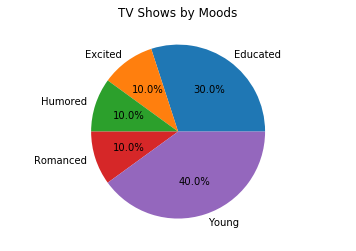

In [13]:
import matplotlib.pyplot as pyplot

x_list = [3, 1, 1, 1, 4]
label_list = ["Educated", "Excited", "Humored", "Romanced", "Young"]

pyplot.axis("equal")
pyplot.pie(
        x_list,
        labels=label_list,
        autopct="%1.1f%%"
        )
pyplot.title("TV Shows by Moods")
pyplot.show()

## Tried to categorize moods (first, w/o lambda, then w/ lambda)

In [15]:
def label_moods(df):
    for index, row in df.iterrows():
        if "Action" in row['genres'] or "Adventure" in row['genres'] or "Thriller" in row['genres'] or "Mystery" in row['genres'] or "Sport" in row['genres']:
            df.at[index, 'mood'] = "Excited"
        elif "Horror" in row['genres']:
            df.at[index, 'mood'] = "Scared"
        elif "Comedy" in row['genres']:
            df.at[index, 'mood'] = "Humored"
        elif "Documentary" in row['genres'] or "Biography" in row['genres'] or "History" in row['genres']:
            df.at[index, 'mood'] = "Educated"
        elif "Romance" in row['genres']:
            df.at[index, 'mood'] = "Romanced"
        elif ("Adult" not in row['genres']) and ("Animation" in row['genres'] or "Short" in row['genres'] or "Comedy" in row['genres']):
            df.at[index, 'mood'] = "Young"
        elif "Fantasy" in row['genres'] or "Sci-Fi" in row['genres'] or "War" in row['genres']:
            df.at[index, 'mood'] = "Explorative"
        else:
            df.at[index, 'mood'] = "Unknown"

In [16]:
is_excited = lambda genres: 'Action' in genres or 'Adventure' in genres or 'Thriller' in genres or 'Mystery' in genres or 'Sport' in genres 
is_scared = lambda genres: 'Horror' in genres
is_humored = lambda genres: 'Comedy' in genres
is_educated = lambda genres: 'Documentary' in genres or 'Biography' in genres or 'History' in genres
is_romanced = lambda genres: 'Romance' in genres
is_young = lambda genres: ('Adult' not in genres) and ('Animation' in genres or 'Short' in genres or 'Comedy' in genres)
is_explorative = lambda genres: 'Fantasy' in genres or 'Sci-Fi' in genres or 'War' in genres

In [17]:
df_ten

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,mood
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",Educated
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",Young
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",Humored
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short",Young
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short,Young
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short,Young
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport",Excited
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short",Educated
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,Romanced
9,tt0000010,short,Employees Leaving the Lumière Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short",Educated


In [18]:
def label_moods_lambda(df):
    for index, row in df.iterrows():
        if is_excited(row['genres']): 
            df.at[index, 'mood'] = "Excited"
        elif is_scared(row['genres']):
            df.at[index, 'mood'] = "Scared"
        elif is_humored(row['genres']):
            df.at[index, 'mood'] = "Humored"
        elif is_educated(row['genres']):
            df.at[index, 'mood'] = "Educated"
        elif is_romanced(row['genres']):
            df.at[index, 'mood'] = "Romanced"
        elif is_young(row['genres']):
            df.at[index, 'mood'] = "Young"
        elif is_explorative(row['genres']):
            df.at[index, 'mood'] = "Explorative"
        else:
            df.at[index, 'mood'] = "Unknown"

In [19]:
label_moods_lambda(df_ten)

In [20]:
df_ten.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,mood
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",Educated
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",Young
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",Humored
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short",Young
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short,Young


In [21]:
print(df_ten.to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>tconst</th>
      <th>titleType</th>
      <th>primaryTitle</th>
      <th>originalTitle</th>
      <th>isAdult</th>
      <th>startYear</th>
      <th>endYear</th>
      <th>runtimeMinutes</th>
      <th>genres</th>
      <th>mood</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>tt0000001</td>
      <td>short</td>
      <td>Carmencita</td>
      <td>Carmencita</td>
      <td>0</td>
      <td>1894</td>
      <td>\N</td>
      <td>1</td>
      <td>Documentary,Short</td>
      <td>Educated</td>
    </tr>
    <tr>
      <th>1</th>
      <td>tt0000002</td>
      <td>short</td>
      <td>Le clown et ses chiens</td>
      <td>Le clown et ses chiens</td>
      <td>0</td>
      <td>1892</td>
      <td>\N</td>
      <td>5</td>
      <td>Animation,Short</td>
      <td>Young</td>
    </tr>
    <tr>
      <th>2</th>
      <td>tt0000003</td>
      <td>short</td>
      

In [26]:
print(df_ten.to_sql)

<bound method NDFrame.to_sql of       tconst titleType                                 primaryTitle  \
0  tt0000001     short                                   Carmencita   
1  tt0000002     short                       Le clown et ses chiens   
2  tt0000003     short                               Pauvre Pierrot   
3  tt0000004     short                                  Un bon bock   
4  tt0000005     short                             Blacksmith Scene   
5  tt0000006     short                            Chinese Opium Den   
6  tt0000007     short  Corbett and Courtney Before the Kinetograph   
7  tt0000008     short       Edison Kinetoscopic Record of a Sneeze   
8  tt0000009     movie                                   Miss Jerry   
9  tt0000010     short        Employees Leaving the Lumière Factory   

                                 originalTitle isAdult startYear endYear  \
0                                   Carmencita       0      1894      \N   
1                       Le clown e

### Stop !

In [ ]:
label_moods_lambda(df)

In [22]:
import random

def random_movie_with_mood(mood):
    entries = df_ten[df_ten['mood'] == mood]
    titles = list(entries.primaryTitle)
    return random.choice(titles)

In [25]:
random_movie_with_mood("Young")

'Blacksmith Scene'

In [ ]:
def display_movie_image(title):

In [63]:
url = "/Users/ayushi/Downloads/title.basics.tsv"

def read_tsv(url):
    with open(url, "r") as f:
        for i, line in enumerate(f):
            line = [a.strip().replace("\\N", "") for a in line.split("\t")]
            yield(line)

In [64]:
%%time
n_lines = 0
for line in read_tsv(url):
    n_lines += 1
print(n_lines)

5088943
CPU times: user 56 s, sys: 1.36 s, total: 57.4 s
Wall time: 1min 12s


In [65]:
%%time
df = pd.DataFrame(read_tsv(url))

CPU times: user 1min 40s, sys: 1min 32s, total: 3min 13s
Wall time: 3min 53s


In [ ]:
df.columns = df.iloc[0]

In [60]:
df.reindex(df.index.drop(0))

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
1,tt0000001,short,Carmencita,Carmencita,0,1894,,1,"Documentary,Short"
2,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,,5,"Animation,Short"
3,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,,4,"Animation,Comedy,Romance"
4,tt0000004,short,Un bon bock,Un bon bock,0,1892,,,"Animation,Short"
5,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,,1,Short
6,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,,1,Short
7,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,,1,"Short,Sport"
8,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,,1,"Documentary,Short"
9,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,,45,Romance
10,tt0000010,short,Employees Leaving the Lumière Factory,La sortie de l'usine Lumière à Lyon,0,1895,,1,"Documentary,Short"
